<center><b><h1> AtliQ Hospitality Analysis </h1></b></center>
<p style="text-align:right;"> By Vedansh Chauhan</p>

#### Contents:
- [Introduction](#welcome)
- [Stage 1: Data Acquisition](#import)
- [Stage 2: Data Preprocessing](#pre)
- [Stage 3: Exploratory Data Analysis](#eda)
- [Conclusion](#goodbye)

## Introduction <a id="welcome"></a>
AtliQ Hospitality is a big player in the hospitality industry. It's known for its exceptional service and luxurious accommodations. The company operates a chain of hotels and resorts that cater to both business and leisure travelers, offering a blend of modern amenities and personalized experiences. Atliq Hospitality emphasizes customer satisfaction, ensuring that every guest's stay is comfortable and memorable. Their properties are strategically located in prime destinations, providing easy access to local attractions and business hubs. With a commitment to sustainability and innovation, Atliq Hospitality continues to set high standards in the hospitality sector, making it a preferred choice for travelers worldwide. Lately, they've been facing stiff competition from their competitors and have been losing market share.

This project aims to analyse the data shared by them in order to study the possible causes of the same.

#### Problem Statement
AtliQ Grands owns multiple five-star hotels across India. They have been in the hospitality industry for the past 20 years. Due to strategic moves from other competitors and ineffective decision-making in management, Atliq Grands are losing its market share and revenue in the luxury/business hotels category. As a strategic move, the managing director of Atliq Grands wanted to incorporate “Business and Data Intelligence” in order to regain their market share and revenue. However, they do not have an in-house data analytics team to provide them with these insights. Their revenue management team had decided to hire a 3rd party service provider to provide them with insights from their historical data.

#### Objectives:
- Analyze the data shared by AtliQ Grands.
- Identify potential causes of losing market share.
- Recommend solutions.

## STAGE 1: DATA ACQUISITION <a id="import"></a>
#### Objectives:
- Importing the necessary libraries
- Importing the dataset

#### Importing the necessary libraries

In [13]:
#Basic Libraries
import numpy as np
import pandas as pd

#Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sbn

#### Importing the dataset

In [15]:
bookings = pd.read_csv("C:\\Users\\Vedansh Chauhan\\Documents\\I2\\Project 9\\Dataset\\fact_bookings.csv")
bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920


In [16]:
bookings.shape

(134590, 12)

In [17]:
agg_bookings = pd.read_csv("C:\\Users\\Vedansh Chauhan\\Documents\\I2\\Project 9\\Dataset\\fact_aggregated_bookings.csv")
agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30
1,19562,01-May-22,RT1,28,30
2,19563,01-May-22,RT1,23,30
3,17558,01-May-22,RT1,13,19
4,16558,01-May-22,RT1,18,19


In [18]:
agg_bookings.shape

(9200, 5)

In [19]:
rooms = pd.read_csv("C:\\Users\\Vedansh Chauhan\\Documents\\I2\\Project 9\\Dataset\\dim_rooms.csv")
rooms.head()

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [20]:
rooms.shape

(4, 2)

In [21]:
hotels = pd.read_csv("C:\\Users\\Vedansh Chauhan\\Documents\\I2\\Project 9\\Dataset\\dim_hotels.csv")
hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [22]:
hotels.shape

(25, 4)

In [23]:
dates = pd.read_csv("C:\\Users\\Vedansh Chauhan\\Documents\\I2\\Project 9\\Dataset\\dim_date.csv")
dates.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [24]:
dates.shape

(92, 4)

## STAGE 2: DATA PRE-PROCESSING <a id="pre"></a>
#### Objectives:
- Feature Engineering
- Imputation

#### Feature Engineering

In [27]:
#Merging the 'aggregate bookings' and 'rooms' dataframes based on room type
agg_book = pd.merge(agg_bookings, rooms, left_on='room_category', right_on='room_id', how='outer')

#Merging the result with the 'hotels' dataframes based on 
agg_book = pd.merge(agg_book, hotels, on='property_id', how='outer')

#Merging the result with the 'dates' dataframe based on the check-in dates
agg_book = pd.merge(agg_book, dates, left_on='check_in_date', right_on='date', how='outer')

#Combining the 'Room ID' and 'Room Category' columns.
agg_book['room_id_class'] = agg_book['room_id'] + ' (' + agg_book['room_class'] + ')'
agg_book.drop(['room_category', 'room_id', 'room_class'], axis=1, inplace=True)

agg_book.head()

,property_id,check_in_date,successful_bookings,capacity,property_name,category,city,date,mmm yy,week no,day_type,room_id_class
0,16559,01-May-22,25,30,Atliq Exotica,Luxury,Mumbai,01-May-22,May 22,W 19,weekend,RT1 (Standard)
1,16559,01-May-22,35,41,Atliq Exotica,Luxury,Mumbai,01-May-22,May 22,W 19,weekend,RT2 (Elite)
2,16559,01-May-22,27,32,Atliq Exotica,Luxury,Mumbai,01-May-22,May 22,W 19,weekend,RT3 (Premium)
3,16559,01-May-22,17,18,Atliq Exotica,Luxury,Mumbai,01-May-22,May 22,W 19,weekend,RT4 (Presidential)
4,19562,01-May-22,28,30,Atliq Bay,Luxury,Bangalore,01-May-22,May 22,W 19,weekend,RT1 (Standard)


In [28]:
agg_book.shape

(9200, 12)

In [29]:
agg_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   property_id          9200 non-null   int64 
 1   check_in_date        9200 non-null   object
 2   successful_bookings  9200 non-null   int64 
 3   capacity             9200 non-null   int64 
 4   property_name        9200 non-null   object
 5   category             9200 non-null   object
 6   city                 9200 non-null   object
 7   date                 9200 non-null   object
 8   mmm yy               9200 non-null   object
 9   week no              9200 non-null   object
 10  day_type             9200 non-null   object
 11  room_id_class        9200 non-null   object
dtypes: int64(3), object(9)
memory usage: 862.6+ KB


In [30]:
#Dictionary Mapping
room_map = {'RT1': 'RT1 (Standard)',
            'RT2': 'RT2 (Elite)',
            'RT3': 'RT3 (Premium)',
            'RT4': 'RT4 (Presidential)'}
bookings['room_id_class'] = bookings['room_category'].map(room_map)
bookings.drop('room_category', axis=1, inplace=True)

In [31]:
#Pandas Date and Time object
bookings['booking_date'] = pd.to_datetime(bookings['booking_date'], format='%Y-%m-%d')
bookings['check_in_date'] = pd.to_datetime(bookings['check_in_date'], format='%Y-%m-%d')
bookings['checkout_date'] = pd.to_datetime(bookings['checkout_date'], format='%Y-%m-%d')

'no_guests' might indicate that there were no guests which is not what it means here. I'll rename the column to 'num_guests'.

In [33]:
bookings = bookings.rename(columns={'no_guests': 'num_guests'})
bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,num_guests,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,room_id_class
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,direct online,1.0,Checked Out,10010,10010,RT1 (Standard)
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,others,NaN,Cancelled,9100,3640,RT1 (Standard)
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,logtrip,5.0,Checked Out,9100,9100,RT1 (Standard)
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,others,NaN,Cancelled,9100,3640,RT1 (Standard)
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,direct online,5.0,Checked Out,10920,10920,RT1 (Standard)


#### Imputation

In [35]:
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   booking_id         134590 non-null  object        
 1   property_id        134590 non-null  int64         
 2   booking_date       134590 non-null  datetime64[ns]
 3   check_in_date      134590 non-null  datetime64[ns]
 4   checkout_date      134590 non-null  datetime64[ns]
 5   num_guests         134590 non-null  int64         
 6   booking_platform   134590 non-null  object        
 7   ratings_given      56683 non-null   float64       
 8   booking_status     134590 non-null  object        
 9   revenue_generated  134590 non-null  int64         
 10  revenue_realized   134590 non-null  int64         
 11  room_id_class      134590 non-null  object        
dtypes: datetime64[ns](3), float64(1), int64(4), object(4)
memory usage: 12.3+ MB


*Some customers appear to have ommited providing a rating feedback.*

## STAGE 3: EXPLORATORY DATA ANALYSIS (EDA) <a id="eda"></a>
#### Objectives:
- General Statistics
- Occupancy Analysis
- Revenue Analysis

### General Statistics
##### Total Number of bookings

In [39]:
bookings['booking_id'].nunique()

134590

##### Names of properties and their categories

In [41]:
for i in [agg_book['property_name'].unique(), agg_book['category'].unique()]:
    print (i)

['Atliq Exotica' 'Atliq Bay' 'Atliq Palace' 'Atliq Grands' 'Atliq City'
 'Atliq Blu' 'Atliq Seasons']
['Luxury' 'Business']


##### Categories of rooms and the room class types

In [43]:
for i in agg_book['room_id_class'].unique():
    print(i)

RT1 (Standard)
RT2 (Elite)
RT3 (Premium)
RT4 (Presidential)


##### Total number of properties

In [45]:
bookings['property_id'].count()

134590

##### Number of unique properties

In [47]:
len(bookings['property_id'].unique())

25

##### Types of booking platforms

In [49]:
for i in bookings['booking_platform'].unique():
    print (i)

direct online
others
logtrip
tripster
makeyourtrip
journey
direct offline


##### Total number of rooms available

In [51]:
agg_book['capacity'].sum()

232576

##### Cities operated in

In [53]:
print(agg_book['city'].unique())

['Mumbai' 'Bangalore' 'Delhi' 'Hyderabad']


### Occupancy Analysis
##### Total number of successful bookings

In [55]:
agg_book['successful_bookings'].sum()

134590

##### Rate of booking

In [57]:
print(f"Rate of booking: {round((agg_book['successful_bookings'].sum()/agg_book['capacity'].sum())*100)}%")

Rate of booking: 58%


##### Total revenue realized (INR)

In [59]:
bookings['revenue_realized'].sum()

1708771229

##### Customer Ratings

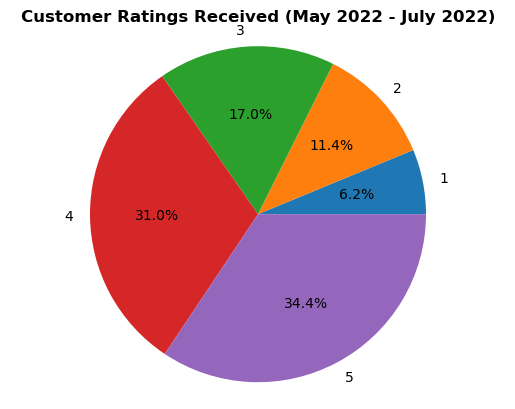

In [61]:
plt.pie(bookings['ratings_given'].value_counts().sort_values(), labels=[1,2,3,4,5], autopct='%1.1f%%')
plt.title('Customer Ratings Received (May 2022 - July 2022)', fontweight='bold')
plt.axis('equal')
plt.show()

##### Average Overall Rating

In [63]:
bookings['ratings_given'].mean().round(2)

3.62

##### Status of Bookings

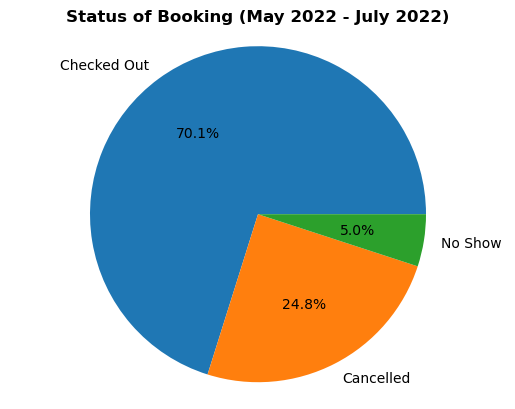

In [65]:
label_status = bookings['booking_status'].unique()

plt.pie(bookings['booking_status'].value_counts(), labels=label_status, autopct='%1.1f%%')
plt.title('Status of Booking (May 2022 - July 2022)', fontweight='bold')
plt.axis('equal')
plt.show()

In [66]:
#Creating an Occupancy Percentage Column
agg_book['occup_percent'] = agg_book.apply(lambda i: round((i['successful_bookings']/i['capacity'])*100, 2), axis=1)

In [67]:
#Exporting the data for further Analysis
agg_book.to_csv('agg_book.csv')
bookings.to_csv('bookings.csv')

##### Average Occupancy Rate by City

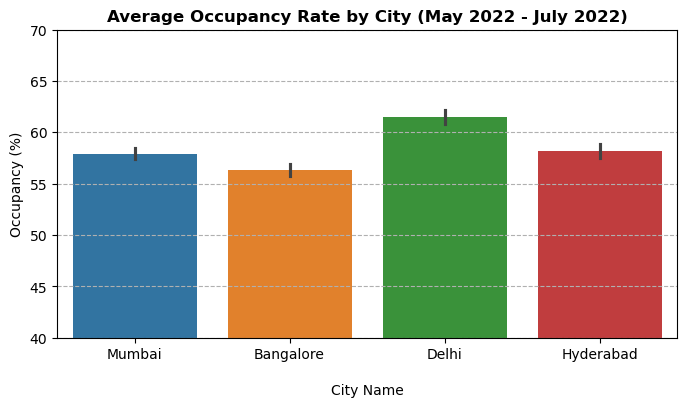

In [69]:
plt.figure(figsize=(8,4))
sbn.barplot(data=agg_book, x='city', y='occup_percent', hue='city')
plt.title('Average Occupancy Rate by City (May 2022 - July 2022)', fontweight='bold')
plt.xlabel('\nCity Name')
plt.ylabel('Occupancy (%)')
plt.ylim(40,70)
plt.grid(axis='y', linestyle='--')
plt.show()

##### Average Occupancy Rate by City and Month

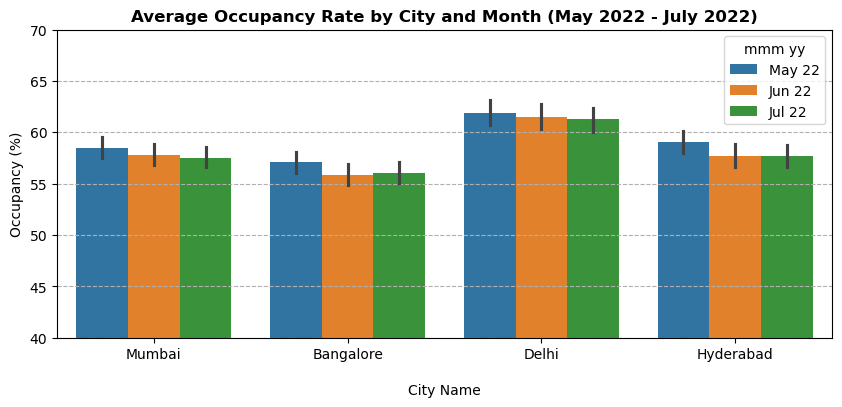

In [71]:
plt.figure(figsize=(10,4))
sbn.barplot(data=agg_book, x='city', y='occup_percent', hue='mmm yy')
plt.title('Average Occupancy Rate by City and Month (May 2022 - July 2022)', fontweight='bold')
plt.xlabel('\nCity Name')
plt.ylabel('Occupancy (%)')
plt.ylim(40,70)
plt.grid(axis='y', linestyle='--')
plt.show()

##### Average Occupancy Rate by Property

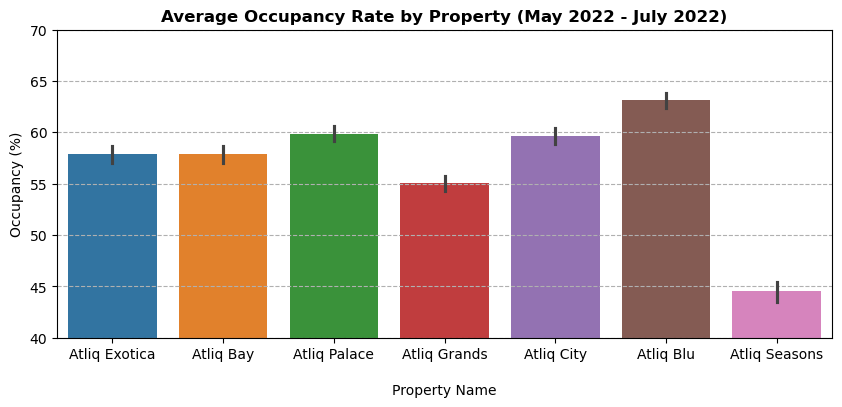

In [73]:
plt.figure(figsize=(10,4))
sbn.barplot(data=agg_book, x='property_name', y='occup_percent', hue='property_name')
plt.title('Average Occupancy Rate by Property (May 2022 - July 2022)', fontweight='bold')
plt.xlabel('\nProperty Name')
plt.ylabel('Occupancy (%)')
plt.ylim(40,70)
plt.grid(axis='y', linestyle='--')
plt.show()

##### Average Occupancy Rate by Property and Month

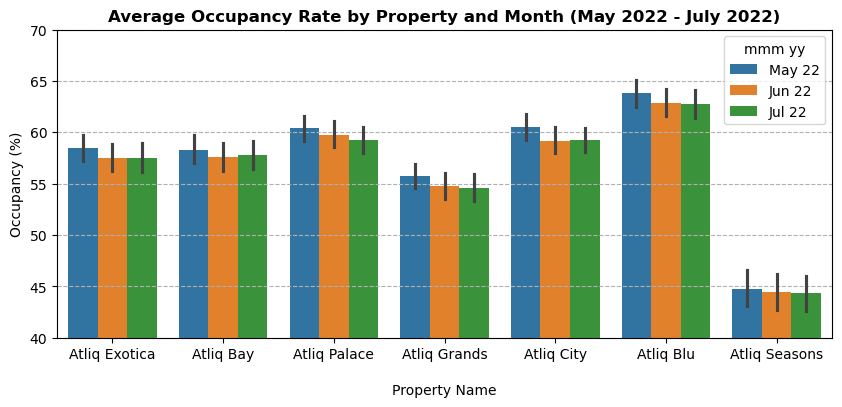

In [75]:
plt.figure(figsize=(10,4))
sbn.barplot(data=agg_book, x='property_name', y='occup_percent', hue='mmm yy')
plt.title('Average Occupancy Rate by Property and Month (May 2022 - July 2022)', fontweight='bold')
plt.xlabel('\nProperty Name')
plt.ylabel('Occupancy (%)')
plt.ylim(40,70)
plt.grid(axis='y', linestyle='--')
plt.show()

##### Average Occupancy Rate by Room ID

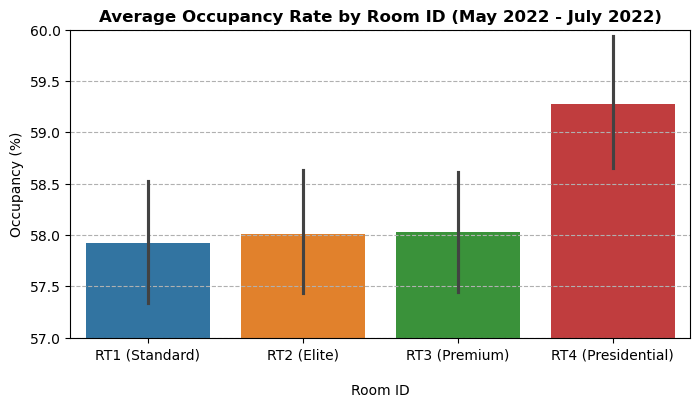

In [77]:
plt.figure(figsize=(8,4))
sbn.barplot(data=agg_book, x='room_id_class', y='occup_percent', hue='room_id_class')
plt.title('Average Occupancy Rate by Room ID (May 2022 - July 2022)', fontweight='bold')
plt.xlabel('\nRoom ID')
plt.ylabel('Occupancy (%)')
plt.ylim(57,60)
plt.grid(axis='y', linestyle='--')
plt.show()

##### Average Occupancy Rate by Room Category

In [79]:
round(agg_book.groupby('category')['occup_percent'].mean(), 2)

category
Business    58.03
Luxury      58.46
Name: occup_percent, dtype: float64

##### Average Occupancy Rate by Day Type

In [81]:
round(agg_book.groupby('day_type')['occup_percent'].mean(), 2)

day_type
weekeday    51.81
weekend     73.96
Name: occup_percent, dtype: float64

##### Occupancy Rate by Month

In [83]:
agg_book.groupby('mmm yy')['occup_percent'].mean().round(2)

mmm yy
Jul 22    57.94
Jun 22    58.03
May 22    58.94
Name: occup_percent, dtype: float64

##### Frequency of Number of Guests

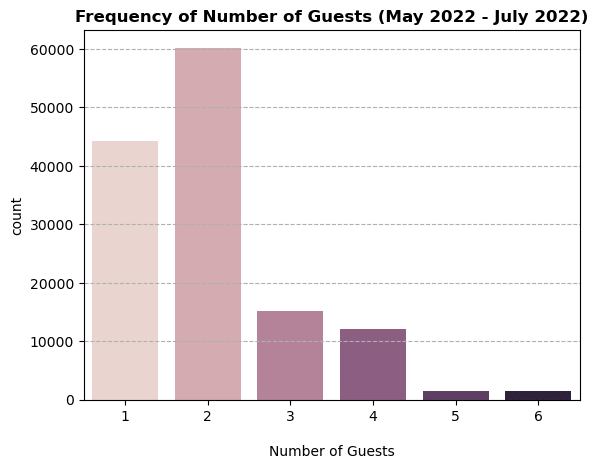

In [85]:
sbn.countplot(data=bookings, x='num_guests', hue='num_guests', legend=False)
plt.title('Frequency of Number of Guests (May 2022 - July 2022)', fontweight='bold')
plt.xlabel('\nNumber of Guests')
plt.grid(axis='y', linestyle='--')
plt.show()

##### Average Number of Guests 

In [87]:
print(f"Number of guests average at {round(bookings['num_guests'].mean())} in a span of three months.")

Number of guests average at 2 in a span of three months.


### Revenue Analysis
##### Total Revenue Generated

In [89]:
bookings['revenue_generated'].sum()

2007546215

##### Total Revenue Realized

In [91]:
bookings['revenue_realized'].sum()

1708771229

##### Revenue Realized by Booking Platform

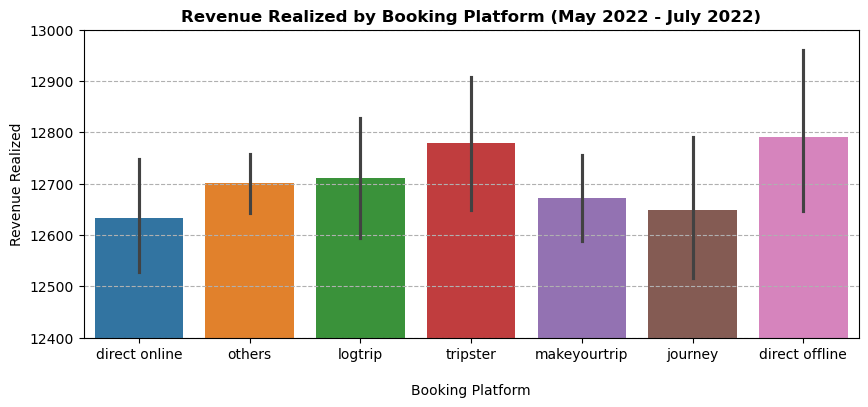

In [93]:
plt.figure(figsize=(10,4))
sbn.barplot(data=bookings, x='booking_platform', y='revenue_realized', hue='booking_platform')
plt.title('Revenue Realized by Booking Platform (May 2022 - July 2022)', fontweight='bold')
plt.ylim(12400,13000)
plt.xlabel('\nBooking Platform')
plt.ylabel('Revenue Realized')
plt.grid(axis='y', linestyle='--')
plt.show()

##### Revenue Realized by Room Class

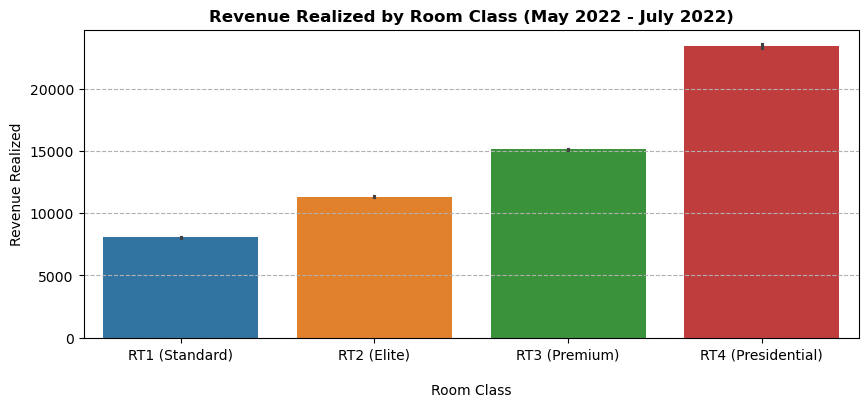

In [95]:
plt.figure(figsize=(10,4))
sbn.barplot(data=bookings, x='room_id_class', y='revenue_realized', hue='room_id_class')
plt.title('Revenue Realized by Room Class (May 2022 - July 2022)', fontweight='bold')
#plt.ylim(12400,13000)
plt.xlabel('\nRoom Class')
plt.ylabel('Revenue Realized')
plt.grid(axis='y', linestyle='--')
plt.show()

## CONCLUSION <a id="goodbye"></a>
Through the analysis conducted above as well as the PowerBI Dashboard, I conclude the following:

- Occupancy:
    - AtliQ Blu had the highest occupancy rate.
    - Delhi was the most occupied.
    - RT4 (Presidential class) rooms experienced the highest occupancy rate.
    - Occupancy was the highest in May (among May, June, and July).
    - Most accommodations were luxury (leisure) stays.
    - Most accommodations were 1-day stays.
    - Weekends experienced much higher accommodation
- Revenue:
    - AtliQ Exotica generated the highest revenue.
    - Mumbai gathered the highest revenue.
    - RT2 (Elite class) rooms gathered the highest bookings, revenue, as well as cancellations.
    - Most revenue was generated through bookings made by unnamed other platforms.
- Ratings:
    - Properties in Delhi scored the highest rating of about 3.8 among all cities despite gathering the least amount of revenue.
    - RT4 (Presidential class) rooms were rated the highest despite being the second lowest in realizing revenue.
    - The 'journey' platform received the highest rating.

### Recommended Solutions:
- Statistics alone don't tell the whole story. Hence, short and simple surveys must be conducted to understand what guests like about AtliQ Blu and the RT4 rooms, and similar aspects must be introduced in creative forms to other properties as well as other room classes.
- Accommodation has been higher over the weekends. Weekend offers as well as live shows must be organized in order to attract more guests. There must be even better offers for weekdays in order to avoid being overbooked over the weekends.
- Properties in Delhi incurred a great number of guests as well as the highest rating among all cities, which suggests a high degree of guest satisfaction. Steps must be taken to increase the revenue earned from properties in this state.
- Collaborating with various booking platforms and running short-term offers would help generate exposure.

<p style="text-align:center;"> - THANK YOU - </p>